# Check CPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Not connected to a GPU
Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted


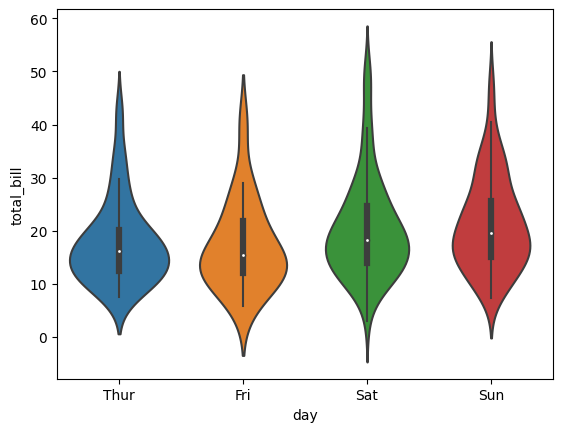

In [2]:
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [3]:
# Load in the dataset

DATASET_PATH = 'mount/My Drive/Colab Notebooks/FIXED-CICIDS2017/'
df1 = pd.read_csv(DATASET_PATH + 'Friday-WorkingHours.csv')

#df1=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print("Read in df1 - DDoS")

#df2=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#print("Read in df2 - PortScan")
    
#df3=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Friday-WorkingHours-Morning.pcap_ISCX.csv')
#print("Read in df3 - Botnet")
    
df4=pd.read_csv(DATASET_PATH + 'Monday-WorkingHours.csv')
print("Read in df4 - Benign (Normal Human Activities)")
    
df5=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
print("Read in df5 - Infiltration")
    
#df6=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
#print("Read in df6 - Web Attacks")
    
df7=pd.read_csv(DATASET_PATH + 'Tuesday-WorkingHours.csv')
print("Read in df7 - Brute Force")
    
df8=pd.read_csv(DATASET_PATH + 'Wednesday-WorkingHours.csv')
print("Read in df8 - DoS/DDoS/HeartBleed")

#frames = [df1, df2, df3, df4]
#frames = [df1, df2, df3, df4, df5, df6, df7, df8]
frames = [df1, df4, df5, df7, df8]
print("Before Concat")
df = pd.concat(frames)

#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

Read in df1 - DDoS
Read in df4 - Benign (Normal Human Activities)
Read in df5 - Infiltration
Read in df7 - Brute Force
Read in df8 - DoS/DDoS/HeartBleed
Before Concat


tcmalloc: large alloc 1411751936 bytes == 0x14c824000 @  0x7efd3bb05001 0x7efd2db851af 0x7efd2dbdbc23 0x7efd2dbdbf4f 0x7efd2dc7e673 0x58f62c 0x510bf2 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50d482 0x4d14d6 0x57471e 0x5390c3 0x50cb08 0x5b575e 0x58ff2e 0x510325 0x5b4ee6 0x6005a3 0x631909 0x58f4ed 0x50ff13 0x4d01b4 0x510938 0x4d01b4 0x510938 0x4d01b4 0x4d222f
tcmalloc: large alloc 1411751936 bytes == 0x1a0a7e000 @  0x7efd3bb05001 0x7efd2db851af 0x7efd2dbdbc23 0x7efd2dbdbe08 0x7efd2dcaa72b 0x7efd2dcaa7d2 0x7efd2dc73e01 0x4d22a6 0x51041f 0x5b575e 0x58ff2e 0x510325 0x5b4ee6 0x6005a3 0x631909 0x58f4ed 0x50ff13 0x4d01b4 0x510938 0x4d01b4 0x510938 0x4d01b4 0x4d222f 0x51041f 0x58fd37 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x4bad0a 0x4d3249


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,07/07/2017 01:59:50 PM,112740690,32,16,...,32,3.594286e+02,1.199802e+01,380.0,343.0,1.610540e+07,4.988048e+05,16399772.0,15375229.0,BENIGN
1,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,07/07/2017 01:59:50 PM,112740560,32,16,...,32,3.202857e+02,1.574499e+01,330.0,285.0,1.610543e+07,4.987937e+05,16399782.0,15375263.0,BENIGN
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,07/07/2017 02:00:31 PM,113757377,545,0,...,0,9.361829e+06,7.324646e+06,18851791.0,19.0,1.221036e+07,6.935824e+06,20757030.0,5504997.0,BENIGN
3,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,07/07/2017 02:00:42 PM,91997219,388,0,...,8,9.801664e+06,1.152782e+07,24721964.0,16.0,1.319764e+07,5.826905e+06,19776791.0,5817470.0,BENIGN
4,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,07/07/2017 02:00:42 PM,66966070,6,6,...,8,1.968172e+06,0.000000e+00,1968172.0,1968172.0,6.497443e+07,0.000000e+00,64974431.0,64974431.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,192.168.10.8-198.51.152.183-59942-80-6,192.168.10.8,59942,198.51.152.183,80,6,05/07/2017 07:50:58 PM,5074745,7,6,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496775,192.168.10.16-192.168.10.3-27998-53-17,192.168.10.16,27998,192.168.10.3,53,17,05/07/2017 03:03:34 PM,209,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496776,192.168.10.51-23.208.163.130-58030-443-6,192.168.10.51,58030,23.208.163.130,443,6,05/07/2017 03:04:59 PM,116281383,24,21,...,20,4.863300e+04,8.804912e+04,328226.0,23012.0,9.639210e+06,1.321437e+06,10024910.0,5443180.0,BENIGN
496777,192.168.10.5-192.168.10.3-51818-53-17,192.168.10.5,51818,192.168.10.3,53,17,05/07/2017 08:20:02 PM,149,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN


In [4]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [5]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
Y_attack = le.transform(df['Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2



,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg
0,0.939506,0.000146,0.000055,0.000501,1.757565e-06,0.016237,0.000000,0.034889,0.028767,0.003687,...,0.0,0.0,0.029536,0.074486,0.034889,0.016473,0.000000,0.000000,0.000000,0.000000
1,0.939505,0.000146,0.000055,0.000501,7.713757e-06,0.016237,0.000000,0.034889,0.028767,0.016180,...,0.0,0.0,0.029536,0.112749,0.034889,0.072300,0.000000,0.000000,0.000000,0.000000
2,0.947978,0.002480,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.766644,0.001766,0.000000,0.002887,0.000000e+00,0.009146,0.025136,0.016579,0.007839,0.000000,...,0.0,0.0,0.000000,0.045045,0.016579,0.000000,0.001016,0.004984,0.000010,0.000000
4,0.558051,0.000027,0.000021,0.000022,4.393912e-07,0.001934,0.032609,0.008311,0.000000,0.002458,...,0.0,0.0,0.059072,0.022581,0.008311,0.010982,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,0.042290,0.000032,0.000021,0.000045,1.836899e-06,0.023449,0.000000,0.014396,0.030910,0.030824,...,0.0,0.0,0.050633,0.064631,0.014396,0.045912,0.000000,0.000000,0.000000,0.000000
496775,0.000002,0.000009,0.000007,0.000005,3.509027e-07,0.001410,0.023777,0.006060,0.000000,0.005888,...,0.0,0.0,0.059072,0.035283,0.006060,0.026312,0.000000,0.000000,0.000000,0.000000
496776,0.969012,0.000109,0.000072,0.000054,8.255368e-06,0.012973,0.000000,0.005043,0.011133,0.074142,...,0.0,0.0,0.051688,0.063875,0.005043,0.058953,0.000000,0.000000,0.000000,0.000029
496777,0.000001,0.000009,0.000007,0.000006,1.586691e-07,0.001450,0.024457,0.006233,0.000000,0.002663,...,0.0,0.0,0.059072,0.020699,0.006233,0.011897,0.000000,0.000000,0.000000,0.000000


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [6]:
# Output the classes
outcome = df['Label'].unique()
print(outcome)

Y_attack = df['Label']
print(Y_attack)

['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object


#Resample the dataset adjusting for bias

In [7]:
# Resample
import imblearn
print("imblearn:" + imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# print(Y_class)
print(Y_attack)
x_scaled = np.array(df2)
transformed_label = le.fit_transform(Y_attack)
print(transformed_label)

#define oversampling strategy
print(outcome)
# orig_sampling_strategy = {
#     "BENIGN"                    : 2271320,
#     "DDoS"                      :  128025,
#     'PortScan'                  :  158804, 
#     'Bot'                       :    1956, 
#     'Infiltration'               :      36,
#     'Web Attack � Brute Force'  :    1507, 
#     'Web Attack � XSS'          :     652,
#     'Web Attack � Sql Injection':      21, 
#     'FTP-Patator'               :    7935, 
#     'SSH-Patator'               :    5897, 
#     'DoS slowloris'             :    5796,
#     'DoS Slowhttptest'          :    5499, 
#     'DoS Hulk'                  :  231073, 
#     'DoS GoldenEye'             :   10293, 
#     'Heartbleed'                :      11
# }

over_sampling_strategy25 = { # Minimum 25
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      25, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      25
}

over_sampling_strategy30 = { # Minimum 30
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      30, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      30
}

over_sampling_strategy200 = { # Minimum 200
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     200,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     200, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     200
}

over_sampling_strategy_300 = { # Minimum 300
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     300,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     300, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     300
}

over_sampling_strategy_orig = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         : 1470,
    'Bot'                                     : 738,  
    'PortScan'                                : 159151,
    'DDoS'                                    : 95123,
    'Web Attack - Brute Force'                : 151,
    'Web Attack - Brute Force - Attempted'    : 1214,
    'Infiltration - Attempted'                 : 16,
    'Infiltration'                             : 32,
    'Web Attack - XSS - Attempted'            : 652,
    'Web Attack - XSS'                        : 27,
    'Web Attack - Sql Injection'              : 12,
    'FTP-Patator'                             : 3973,
    'SSH-Patator'                             : 2980,
    'FTP-Patator - Attempted'                 : 11,
    'SSH-Patator - Attempted'                 : 8,
    'DoS slowloris'                           : 4001,
    'DoS slowloris - Attempted'               : 1731,
    'DoS Slowhttptest'                        : 1742,
    'DoS Slowhttptest - Attempted'            : 3369,
    'DoS Hulk'                                : 158469,
    'DoS Hulk - Attempted'                    : 593,
    'DoS GoldenEye'                           : 7567,
    'Heartbleed'                              : 11,
    'DoS GoldenEye - Attempted'               : 80
}

over_sampling_strategy300 = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         :    1470,
    'Bot'                                     :     738,  
    'PortScan'                                :  159151,
    'DDoS'                                    :   95123,
    'Web Attack - Brute Force'                :     399,
    'Web Attack - Brute Force - Attempted'    :    1214,
    'Infiltration - Attempted'                 :     300,
    'Infiltration'                             :     300,
    'Web Attack - XSS - Attempted'            :     652,
    'Web Attack - XSS'                        :     300,
    'Web Attack - Sql Injection'              :     300,
    'FTP-Patator'                             :    3973,
    'SSH-Patator'                             :    2980,
    'FTP-Patator - Attempted'                 :     300,
    'SSH-Patator - Attempted'                 :     300,
    'DoS slowloris'                           :    4001,
    'DoS slowloris - Attempted'               :    1731,
    'DoS Slowhttptest'                        :    1742,
    'DoS Slowhttptest - Attempted'            :    3369,
    'DoS Hulk'                                :  158469,
    'DoS Hulk - Attempted'                    :     593,
    'DoS GoldenEye'                           :    7567,
    'Heartbleed'                              :     300,
    'DoS GoldenEye - Attempted'               :     300
}

over_sampling_strategy200 = { # Minimum 200
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         :    1470,
    'Bot'                                     :     738,  
    'PortScan'                                :  159151,
    'DDoS'                                    :   95123,
    'Web Attack - Brute Force'                :     399,
    'Web Attack - Brute Force - Attempted'    :    1214,
    'Infiltration - Attempted'                 :     200,
    'Infiltration'                             :     200,
    'Web Attack - XSS - Attempted'            :     652,
    'Web Attack - XSS'                        :     200,
    'Web Attack - Sql Injection'              :     200,
    'FTP-Patator'                             :    3973,
    'SSH-Patator'                             :    2980,
    'FTP-Patator - Attempted'                 :     200,
    'SSH-Patator - Attempted'                 :     300,
    'DoS slowloris'                           :    4001,
    'DoS slowloris - Attempted'               :    1731,
    'DoS Slowhttptest'                        :    1742,
    'DoS Slowhttptest - Attempted'            :    3369,
    'DoS Hulk'                                :  158469,
    'DoS Hulk - Attempted'                    :     593,
    'DoS GoldenEye'                           :    7567,
    'Heartbleed'                              :     200,
    'DoS GoldenEye - Attempted'               :     200
}


over = RandomOverSampler(sampling_strategy = over_sampling_strategy300)
print("Oversampling...")
x_over, y_over = over.fit_resample(x_scaled, Y_attack)
x_scaled = x_over
Y_attack = y_over

print("Finished oversampling...")

#define undersampling strategy
under = RandomUnderSampler(sampling_strategy = 'not minority')
print("Undersampling...")
x_under, y_under = under.fit_resample(x_scaled, Y_attack)
print("Finished undersampling...")

print(x_under)
print(y_under)
#from now on use undersampled
x_scaled = x_under
Y_class  = y_under

tempdf2 = pd.DataFrame(x_scaled,columns=subset.columns)
templabledf = pd.DataFrame(Y_class,columns=['Label']) 


print(tempdf2.shape)

print("====")

print(templabledf.shape)

# df74 = pd.concat([tempdf2, templabledf.reindex(df1.index)], axis=1)
dfresampled = tempdf2
dfresampled['Label'] = templabledf

print(dfresampled.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfresampled['Label'])
transformed_label = le.transform(templabledf['Label']) # multi-class 
print(transformed_label)

my_df2 = dfresampled
print("===== Labels ======")
print(Y_attack.unique())
print(transformed_label)

imblearn:0.8.1
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object
[0 0 0 ... 0 0 0]
['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
Oversampling...


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2017042) in class BENIGN will be larger than the number of samples in the majority class (class #BENIGN -> 1657069)
  f"After over-sampling, the number of samples ({n_samples})"


Finished oversampling...
Undersampling...
Finished undersampling...
[[2.60116643e-04 4.55043934e-06 3.42557258e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.87602483e-03 4.55043934e-06 3.42557258e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.83076268e-01 1.54714938e-04 1.06192750e-04 ... 0.00000000e+00
  0.00000000e+00 1.14696254e-05]
 ...
 [4.47138792e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.26270961e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.50698209e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0                             BENIGN
1                             BENIGN
2                             BENIGN
3                             BENIGN
4                             BENIGN
                    ...             
7495    Web Attack - XSS - Attempted
7496    Web Attack - XSS - Attempted
7497    Web Attack - XSS - Attempted

In [8]:
#print(my_df2)


In [9]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# # le.fit(df2[' Label'])
# # df2[' Label'] = transformed_label
# # Split data based on identified classes
# # df2[' Label'] = df[' Label']
# Y_class = transformed_label # multi-class 
# print(Y_class)
# benign = df2[df2[' Label'] == outcome[0]]
# ddos = df2[df2[' Label'] == outcome[1]]
# portscan = df2[df2[' Label'] == outcome[2]]
# bot = df2[df2[' Label'] == outcome[3]]
# infiltration = df2[df2[' Label'] == outcome[4]]
# webattackbruteforce = df2[df2[' Label'] == outcome[5]]
# webattackxxs = df2[df2[' Label'] == outcome[6]]
# webattacksqlinjection = df2[df2[' Label'] == outcome[7]]
# ftppatator = df2[df2[' Label'] == outcome[8]]
# sshpatator = df2[df2[' Label'] == outcome[9]]
# dosslowloris = df2[df2[' Label'] == outcome[10]]
# dosslowhttptest = df2[df2[' Label'] == outcome[11]]
# doshulk = df2[df2[' Label'] == outcome[12]]
# dosgoldeneye = df2[df2[' Label'] == outcome[13]]
# heartbleed = df2[df2[' Label'] == outcome[14]]

# traffictypes = [benign, ddos, portscan ,bot, infiltration,
# webattackbruteforce, webattackxxs, webattacksqlinjection,
# ftppatator, sshpatator, dosslowloris, dosslowhttptest, doshulk , dosgoldeneye, heartbleed ]

      Flow Duration  Total Fwd Packet  Total Bwd packets  \
0          0.000260          0.000005           0.000003   
1          0.001876          0.000005           0.000003   
2          0.983076          0.000155           0.000106   
3          0.005395          0.000018           0.000010   
4          0.000386          0.000005           0.000003   
...             ...               ...                ...   
7495       0.045510          0.000018           0.000007   
7496       0.045670          0.000018           0.000007   
7497       0.044714          0.000018           0.000007   
7498       0.042627          0.000018           0.000007   
7499       0.045070          0.000018           0.000007   

      Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       0.000003                2.700425e-07   
1                       0.000003                9.153984e-08   
2                       0.000125                1.700658e-05   
3                      

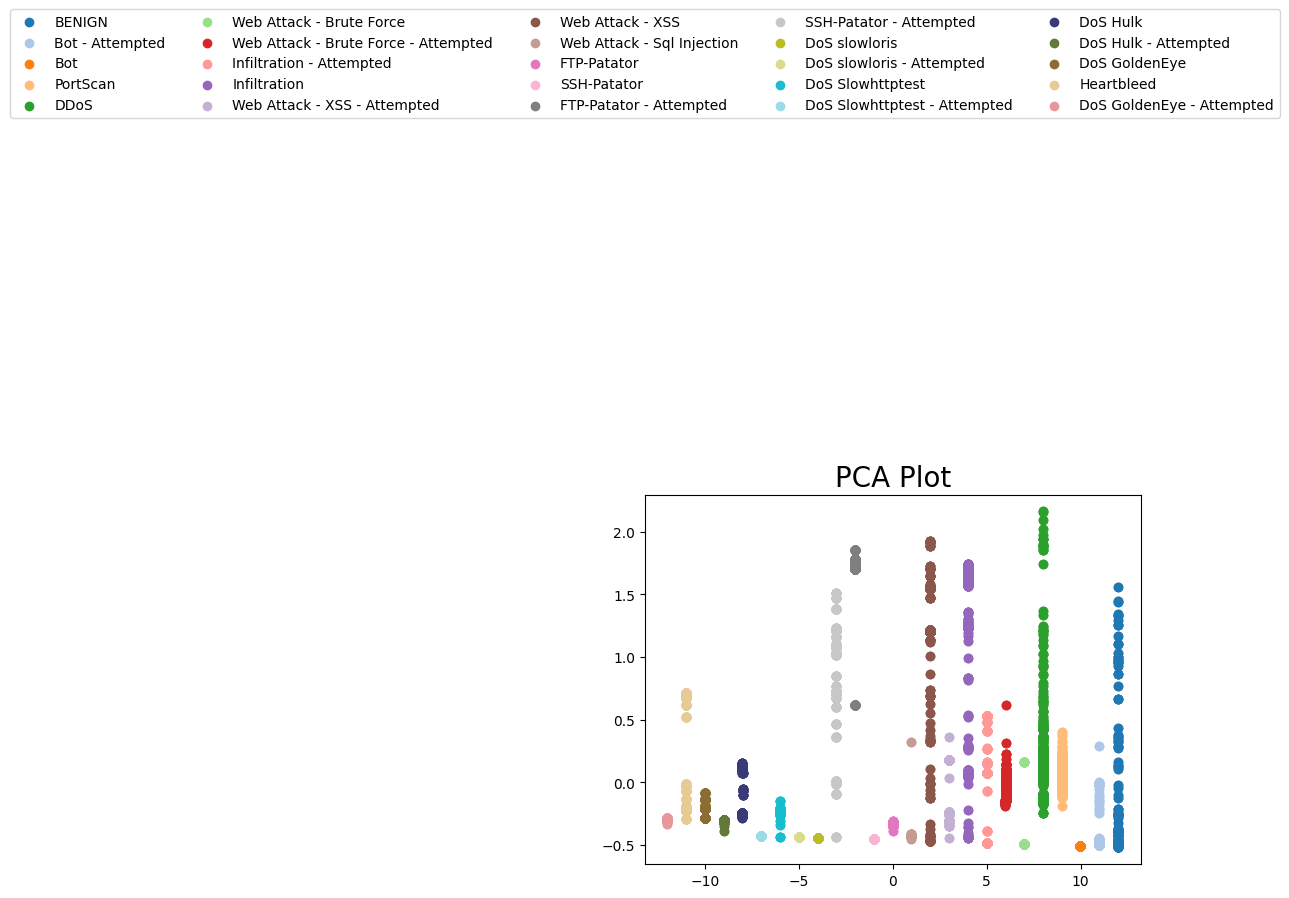

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
my_df2['Label'] = transformed_label
print(my_df2)
print(my_df2.values)
X = pd.DataFrame(pca.fit_transform(my_df2.values), columns=['x', 'y'])
X['Label'] = my_df2['Label']

class0X = X[X['Label'] == 0] 
            # outcome[0]]
class1X = X[X['Label'] == 1] 
          # outcome[1]]
class2X = X[X['Label'] == 2]
class3X = X[X['Label'] == 3]
class4X = X[X['Label'] == 4]
class5X = X[X['Label'] == 5]
class6X = X[X['Label'] == 6]
class7X = X[X['Label'] == 7]
class8X = X[X['Label'] == 8]
class9X = X[X['Label'] == 9]
class10X = X[X['Label'] == 10]
class11X = X[X['Label'] == 11]
class12X = X[X['Label'] == 12]
class13X = X[X['Label'] == 13]
class14X = X[X['Label'] == 14]
class15X = X[X['Label'] == 15]
class16X = X[X['Label'] == 16]
class17X = X[X['Label'] == 17]
class18X = X[X['Label'] == 18]
class19X = X[X['Label'] == 19]
class20X = X[X['Label'] == 20]
class21X = X[X['Label'] == 21]
class22X = X[X['Label'] == 22]
class23X = X[X['Label'] == 23]
class24X = X[X['Label'] == 24]
class25X = X[X['Label'] == 25]

# bot = df2[df2[' Label'] == outcome[3]]
# infiltration = df2[df2[' Label'] == outcome[4]]
# webattackbruteforce = df2[df2[' Label'] == outcome[5]]
# webattackxxs = df2[df2[' Label'] == outcome[6]]
# webattacksqlinjection = df2[df2[' Label'] == outcome[7]]
# ftppatator = df2[df2[' Label'] == outcome[8]]
# sshpatator = df2[df2[' Label'] == outcome[9]]
# dosslowloris = df2[df2[' Label'] == outcome[10]]
# dosslowhttptest = df2[df2[' Label'] == outcome[11]]
# doshulk = df2[df2[' Label'] == outcome[12]]
# dosgoldeneye = df2[df2[' Label'] == outcome[13]]
# heartbleed = df2[df2[' Label'] == outcome[14]]

from matplotlib.cm import get_cmap
import matplotlib.cm as cm

# sns.color_palette("tab20")
# colors=sns.color_palette("tab20")
# colors.dtytpe


# print(colors)
# ax.set_prop_cycle(color=colors)
!pip install cmasher
import cmasher as cmr

colors = cmr.take_cmap_colors('tab20', 20, return_fmt='hex')
more_colors = cmr.take_cmap_colors('tab20b', 6, return_fmt='hex')
print(colors)
print(more_colors)

# plt.cycler("color", plt.get_cmap("tab20").colors)
#plt.scatter(benignX['x'], benignX['y'], c=colors[0],cmap='tab20')
#plt.scatter(ddosX['x'], ddosX['y'], c=colors[1], cmap='tab20')
#plt.scatter(portscan['x'], portscan['y'], c=colors[2], cmap='tab20')
#plt.scatter(bot['x'], bot['y'], c=colors[3],cmap='tab20')
#plt.scatter(infiltration['x'], infiltration['y'], c=colors[4],cmap='tab20')
#plt.scatter(webattackbruteforce['x'], webattackbruteforce['y'], c=colors[5],cmap='tab20')
#plt.scatter(webattackxxs['x'], webattackxxs['y'], c=colors[6],cmap='tab20')
#plt.scatter(webattacksqlinjection['x'], webattacksqlinjection['y'], c=colors[7], cmap='tab20')
#plt.scatter(ftppatator['x'], ftppatator['y'], c=colors[8], cmap='tab20')
#plt.scatter(sshpatator['x'], sshpatator['y'], c=colors[9], cmap='tab20')
#plt.scatter(dosslowloris['x'], dosslowloris['y'], c=colors[10], cmap='tab20')
#plt.scatter(dosslowhttptest['x'], dosslowhttptest['y'], c=colors[11], cmap='tab20')
#plt.scatter(doshulk['x'], doshulk['y'], c=colors[12], cmap='tab20')
#plt.scatter(dosgoldeneye['x'], dosgoldeneye['y'], c=colors[13], cmap='tab20')
#plt.scatter(heartbleed['x'], heartbleed['y'], c=colors[14], cmap='tab20')

plt.scatter(class0X['x'], class0X['y'], c=colors[0], cmap='tab20')
plt.scatter(class1X['x'], class1X['y'], c=colors[1], cmap='tab20')
plt.scatter(class2X['x'], class2X['y'], c=colors[2], cmap='tab20')
plt.scatter(class3X['x'], class3X['y'], c=colors[3], cmap='tab20')
plt.scatter(class4X['x'], class4X['y'], c=colors[4], cmap='tab20')
plt.scatter(class5X['x'], class5X['y'], c=colors[5], cmap='tab20')
plt.scatter(class6X['x'], class6X['y'], c=colors[6], cmap='tab20')
plt.scatter(class7X['x'], class7X['y'], c=colors[7], cmap='tab20')
plt.scatter(class8X['x'], class8X['y'], c=colors[8], cmap='tab20')
plt.scatter(class9X['x'], class9X['y'], c=colors[9], cmap='tab20')
plt.scatter(class10X['x'], class10X['y'], c=colors[10], cmap='tab20')
plt.scatter(class11X['x'], class11X['y'], c=colors[11], cmap='tab20')
plt.scatter(class12X['x'], class12X['y'], c=colors[12], cmap='tab20')
plt.scatter(class13X['x'], class13X['y'], c=colors[13], cmap='tab20')
plt.scatter(class14X['x'], class14X['y'], c=colors[14], cmap='tab20')
plt.scatter(class15X['x'], class15X['y'], c=colors[15], cmap='tab20')
plt.scatter(class16X['x'], class16X['y'], c=colors[16], cmap='tab20')
plt.scatter(class17X['x'], class17X['y'], c=colors[17], cmap='tab20')
plt.scatter(class18X['x'], class18X['y'], c=colors[18], cmap='tab20')
plt.scatter(class19X['x'], class19X['y'], c=colors[19], cmap='tab20')
plt.scatter(class20X['x'], class20X['y'], c=more_colors[0], cmap='tab20')
plt.scatter(class21X['x'], class21X['y'], c=more_colors[1], cmap='tab20b')
plt.scatter(class22X['x'], class22X['y'], c=more_colors[2], cmap='tab20b')
plt.scatter(class23X['x'], class23X['y'], c=more_colors[3], cmap='tab20b')
plt.scatter(class24X['x'], class24X['y'], c=more_colors[4], cmap='tab20b')
plt.scatter(class25X['x'], class25X['y'], c=more_colors[5], cmap='tab20b')

plt.title('PCA Plot', fontsize=20)
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
import string
for i in range(0,len(l_col_list)):
  pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
  l_col_list[i] = pretty_string

# plt.legend(l_col_list)
plt.legend(l_col_list, bbox_to_anchor=(1.04,1), loc="upper left")
# plt.legend(l_col_list, loc="lower center", bbox_to_anchor=(0,1), ncol=5)
basedir='mount/My Drive/Colab Notebooks/Figures/Clustering/'
savename='PCA-Plot' + str(int(len(my_df2)/15)) + '-Samples-Per-Class.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')
# plt.legend(['Benign', 'DDoS', 'PortScan', 'Bot', ])

plt.scatter(class0X['x'], class0X['y'], c=colors[0], cmap='tab20')
plt.scatter(class1X['x'], class1X['y'], c=colors[1], cmap='tab20')
plt.scatter(class2X['x'], class2X['y'], c=colors[2], cmap='tab20')
plt.scatter(class3X['x'], class3X['y'], c=colors[3], cmap='tab20')
plt.scatter(class4X['x'], class4X['y'], c=colors[4], cmap='tab20')
plt.scatter(class5X['x'], class5X['y'], c=colors[5], cmap='tab20')
plt.scatter(class6X['x'], class6X['y'], c=colors[6], cmap='tab20')
plt.scatter(class7X['x'], class7X['y'], c=colors[7], cmap='tab20')
plt.scatter(class8X['x'], class8X['y'], c=colors[8], cmap='tab20')
plt.scatter(class9X['x'], class9X['y'], c=colors[9], cmap='tab20')
plt.scatter(class10X['x'], class10X['y'], c=colors[10], cmap='tab20')
plt.scatter(class11X['x'], class11X['y'], c=colors[11], cmap='tab20')
plt.scatter(class12X['x'], class12X['y'], c=colors[12], cmap='tab20')
plt.scatter(class13X['x'], class13X['y'], c=colors[13], cmap='tab20')
plt.scatter(class14X['x'], class14X['y'], c=colors[14], cmap='tab20')
plt.scatter(class15X['x'], class15X['y'], c=colors[15], cmap='tab20')
plt.scatter(class16X['x'], class16X['y'], c=colors[16], cmap='tab20')
plt.scatter(class17X['x'], class17X['y'], c=colors[17], cmap='tab20')
plt.scatter(class18X['x'], class18X['y'], c=colors[18], cmap='tab20')
plt.scatter(class19X['x'], class19X['y'], c=colors[19], cmap='tab20')
plt.scatter(class20X['x'], class20X['y'], c=more_colors[0], cmap='tab20')
plt.scatter(class21X['x'], class21X['y'], c=more_colors[1], cmap='tab20b')
plt.scatter(class22X['x'], class22X['y'], c=more_colors[2], cmap='tab20b')
plt.scatter(class23X['x'], class23X['y'], c=more_colors[3], cmap='tab20b')
plt.scatter(class24X['x'], class24X['y'], c=more_colors[4], cmap='tab20b')
plt.scatter(class25X['x'], class25X['y'], c=more_colors[5], cmap='tab20b')

plt.title('PCA Plot', fontsize=20)
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
import string
for i in range(0,len(l_col_list)):
  pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
  l_col_list[i] = pretty_string

# plt.legend(l_col_list)
# plt.legend(l_col_list, bbox_to_anchor=(1.04,1), loc="upper left")
plt.legend(l_col_list, loc="lower center", bbox_to_anchor=(0,2), ncol=5)
basedir='mount/My Drive/Colab Notebooks/Figures/Clustering/'
savename='PCA-Legend' +'.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')


# def export_legend(legend, filename="legend.png"):
#     fig  = legend.figure
#     fig.canvas.draw()
#     bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig(filename, dpi="figure", bbox_inches=bbox)


        Flow Duration  Total Fwd Packet  Total Bwd packets  \
0            0.939506          0.000146           0.000055   
1            0.939505          0.000146           0.000055   
2            0.947978          0.002480           0.000000   
3            0.766644          0.001766           0.000000   
4            0.558051          0.000027           0.000021   
...               ...               ...                ...   
496774       0.042290          0.000032           0.000021   
496775       0.000002          0.000009           0.000007   
496776       0.969012          0.000109           0.000072   
496777       0.000001          0.000009           0.000007   
496778       0.000509          0.000018           0.000007   

        Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                         0.000501                1.757565e-06   
1                         0.000501                7.713757e-06   
2                         0.000000                0.00000

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 38.17145776748657 seconds


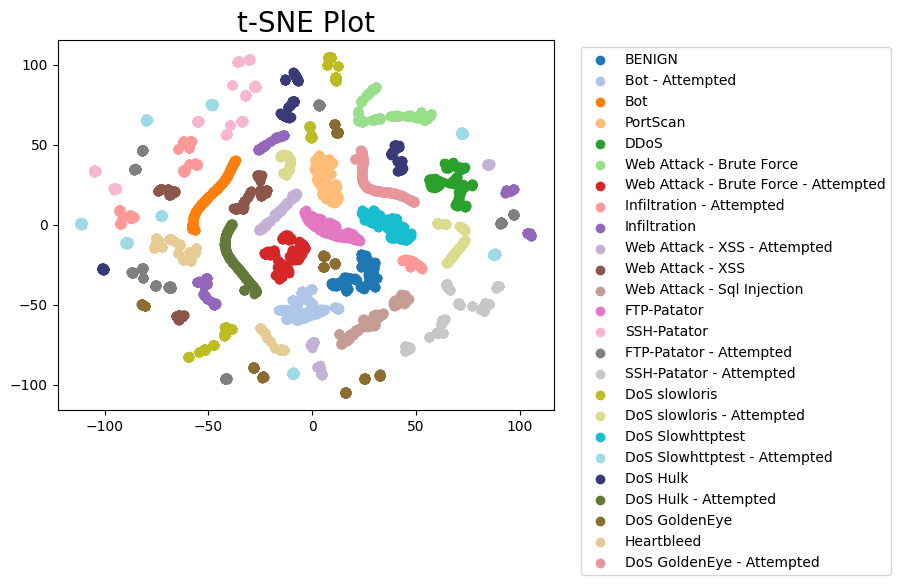

In [11]:
TSNE_PLOT=True
if(TSNE_PLOT):
  from sklearn.manifold import TSNE
  import time

  time_start = time.time()
  tsne = TSNE(n_components=2)
  print(df2)
  
  X = pd.DataFrame(tsne.fit_transform(my_df2.values), columns=['x', 'y'])
  X['Label'] = my_df2['Label']

  class0X = X[X['Label'] == 0] 
            # outcome[0]]
  class1X = X[X['Label'] == 1] 
          # outcome[1]]
  class2X = X[X['Label'] == 2]
  class3X = X[X['Label'] == 3]
  class4X = X[X['Label'] == 4]
  class5X = X[X['Label'] == 5]
  class6X = X[X['Label'] == 6]
  class7X = X[X['Label'] == 7]
  class8X = X[X['Label'] == 8]
  class9X = X[X['Label'] == 9]
  class10X = X[X['Label'] == 10]
  class11X = X[X['Label'] == 11]
  class12X = X[X['Label'] == 12]
  class13X = X[X['Label'] == 13]
  class14X = X[X['Label'] == 14]
  class15X = X[X['Label'] == 15]
  class16X = X[X['Label'] == 16]
  class17X = X[X['Label'] == 17]
  class18X = X[X['Label'] == 18]
  class19X = X[X['Label'] == 19]
  class20X = X[X['Label'] == 20]
  class21X = X[X['Label'] == 21]
  class22X = X[X['Label'] == 22]
  class23X = X[X['Label'] == 23]
  class24X = X[X['Label'] == 24]
  class25X = X[X['Label'] == 25]


  # benignX = X[X['Label'] == outcome[0]]
  # ddosX = X[X['Label'] == outcome[1]]

  colors = cmr.take_cmap_colors('tab20', 20, return_fmt='hex')
  more_colors = cmr.take_cmap_colors('tab20b', 6, return_fmt='hex')

  plt.scatter(class0X['x'], class0X['y'], c=colors[0], cmap='tab20')
  plt.scatter(class1X['x'], class1X['y'], c=colors[1], cmap='tab20')
  plt.scatter(class2X['x'], class2X['y'], c=colors[2], cmap='tab20')
  plt.scatter(class3X['x'], class3X['y'], c=colors[3], cmap='tab20')
  plt.scatter(class4X['x'], class4X['y'], c=colors[4], cmap='tab20')
  plt.scatter(class5X['x'], class5X['y'], c=colors[5], cmap='tab20')
  plt.scatter(class6X['x'], class6X['y'], c=colors[6], cmap='tab20')
  plt.scatter(class7X['x'], class7X['y'], c=colors[7], cmap='tab20')
  plt.scatter(class8X['x'], class8X['y'], c=colors[8], cmap='tab20')
  plt.scatter(class9X['x'], class9X['y'], c=colors[9], cmap='tab20')
  plt.scatter(class10X['x'], class10X['y'], c=colors[10], cmap='tab20')
  plt.scatter(class11X['x'], class11X['y'], c=colors[11], cmap='tab20')
  plt.scatter(class12X['x'], class12X['y'], c=colors[12], cmap='tab20')
  plt.scatter(class13X['x'], class13X['y'], c=colors[13], cmap='tab20')
  plt.scatter(class14X['x'], class14X['y'], c=colors[14], cmap='tab20')
  plt.scatter(class15X['x'], class15X['y'], c=colors[15], cmap='tab20')
  plt.scatter(class16X['x'], class16X['y'], c=colors[16], cmap='tab20')
  plt.scatter(class17X['x'], class17X['y'], c=colors[17], cmap='tab20')
  plt.scatter(class18X['x'], class18X['y'], c=colors[18], cmap='tab20')
  plt.scatter(class19X['x'], class19X['y'], c=colors[19], cmap='tab20')
  plt.scatter(class20X['x'], class20X['y'], c=more_colors[0], cmap='tab20')
  plt.scatter(class21X['x'], class21X['y'], c=more_colors[1], cmap='tab20b')
  plt.scatter(class22X['x'], class22X['y'], c=more_colors[2], cmap='tab20b')
  plt.scatter(class23X['x'], class23X['y'], c=more_colors[3], cmap='tab20b')
  plt.scatter(class24X['x'], class24X['y'], c=more_colors[4], cmap='tab20b')
  plt.scatter(class25X['x'], class25X['y'], c=more_colors[5], cmap='tab20b')

  plt.title('t-SNE Plot', fontsize=20)
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  # plt.legend(l_col_list)
  plt.legend(l_col_list, bbox_to_anchor=(1.04,1), loc="upper left")
  basedir='mount/My Drive/Colab Notebooks/Figures/Clustering/'
  savename='t-SNE-Plot-' + str(int(len(my_df2)/15)) + '-Samples-Per-Class.png'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
else:
  print("Skipping TSNE Plot")
  print("Typical TSNE plot time: 54 Mins (3245 seconds)")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
UMAP done! Time elapsed: 36.724437952041626 seconds


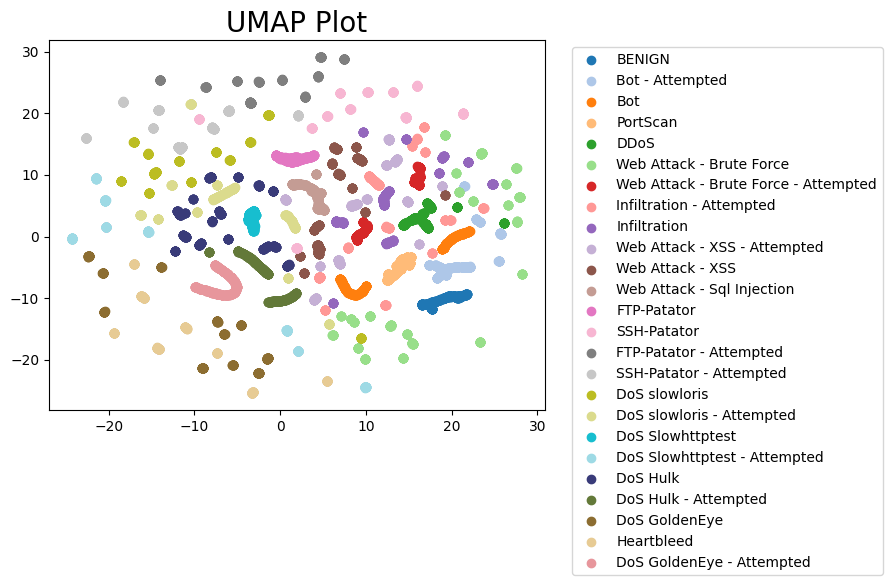

In [12]:
DO_UMAP = True

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

import time

# import umap.umap_ as umap

import umap
import umap.plot

if(DO_UMAP):
  # mapper = umap.UMAP().fit(digits.data)
  # umap.plot.points(mapper, labels=digits.target)
  time_start = time.time()
  X = pd.DataFrame(umap.UMAP().fit_transform(my_df2.values), columns=['x', 'y'])
  X['Label'] = my_df2['Label']

  class0X = X[X['Label'] == 0] 
            # outcome[0]]
  class1X = X[X['Label'] == 1] 
          # outcome[1]]
  class2X = X[X['Label'] == 2]
  class3X = X[X['Label'] == 3]
  class4X = X[X['Label'] == 4]
  class5X = X[X['Label'] == 5]
  class6X = X[X['Label'] == 6]
  class7X = X[X['Label'] == 7]
  class8X = X[X['Label'] == 8]
  class9X = X[X['Label'] == 9]
  class10X = X[X['Label'] == 10]
  class11X = X[X['Label'] == 11]
  class12X = X[X['Label'] == 12]
  class13X = X[X['Label'] == 13]
  class14X = X[X['Label'] == 14]
  class15X = X[X['Label'] == 15]
  class16X = X[X['Label'] == 16]
  class17X = X[X['Label'] == 17]
  class18X = X[X['Label'] == 18]
  class19X = X[X['Label'] == 19]
  class20X = X[X['Label'] == 20]
  class21X = X[X['Label'] == 21]
  class22X = X[X['Label'] == 22]
  class23X = X[X['Label'] == 23]
  class24X = X[X['Label'] == 24]
  class25X = X[X['Label'] == 25]


  plt.scatter(class0X['x'], class0X['y'], c=colors[0], cmap='tab20')
  plt.scatter(class1X['x'], class1X['y'], c=colors[1], cmap='tab20')
  plt.scatter(class2X['x'], class2X['y'], c=colors[2], cmap='tab20')
  plt.scatter(class3X['x'], class3X['y'], c=colors[3], cmap='tab20')
  plt.scatter(class4X['x'], class4X['y'], c=colors[4], cmap='tab20')
  plt.scatter(class5X['x'], class5X['y'], c=colors[5], cmap='tab20')
  plt.scatter(class6X['x'], class6X['y'], c=colors[6], cmap='tab20')
  plt.scatter(class7X['x'], class7X['y'], c=colors[7], cmap='tab20')
  plt.scatter(class8X['x'], class8X['y'], c=colors[8], cmap='tab20')
  plt.scatter(class9X['x'], class9X['y'], c=colors[9], cmap='tab20')
  plt.scatter(class10X['x'], class10X['y'], c=colors[10], cmap='tab20')
  plt.scatter(class11X['x'], class11X['y'], c=colors[11], cmap='tab20')
  plt.scatter(class12X['x'], class12X['y'], c=colors[12], cmap='tab20')
  plt.scatter(class13X['x'], class13X['y'], c=colors[13], cmap='tab20')
  plt.scatter(class14X['x'], class14X['y'], c=colors[14], cmap='tab20')
  plt.scatter(class15X['x'], class15X['y'], c=colors[15], cmap='tab20')
  plt.scatter(class16X['x'], class16X['y'], c=colors[16], cmap='tab20')
  plt.scatter(class17X['x'], class17X['y'], c=colors[17], cmap='tab20')
  plt.scatter(class18X['x'], class18X['y'], c=colors[18], cmap='tab20')
  plt.scatter(class19X['x'], class19X['y'], c=colors[19], cmap='tab20')
  plt.scatter(class20X['x'], class20X['y'], c=more_colors[0], cmap='tab20')
  plt.scatter(class21X['x'], class21X['y'], c=more_colors[1], cmap='tab20b')
  plt.scatter(class22X['x'], class22X['y'], c=more_colors[2], cmap='tab20b')
  plt.scatter(class23X['x'], class23X['y'], c=more_colors[3], cmap='tab20b')
  plt.scatter(class24X['x'], class24X['y'], c=more_colors[4], cmap='tab20b')
  plt.scatter(class25X['x'], class25X['y'], c=more_colors[5], cmap='tab20b')

  # plt.scatter(benignX['x'], benignX['y'])
  # plt.scatter(ddosX['x'], ddosX['y'])
  # plt.scatter(portscan['x'], portscan['y'])
  # plt.scatter(bot['x'], bot['y'])
  # plt.scatter(infiltration['x'], infiltration['y'])
  # plt.scatter(webattackbruteforce['x'], webattackbruteforce['y'])
  # plt.scatter(webattackxxs['x'], webattackxxs['y'])
  # plt.scatter(webattacksqlinjection['x'], webattacksqlinjection['y'])
  # plt.scatter(ftppatator['x'], ftppatator['y'])
  # plt.scatter(sshpatator['x'], sshpatator['y'])
  # plt.scatter(dosslowloris['x'], dosslowloris['y'])
  # plt.scatter(dosslowhttptest['x'], dosslowhttptest['y'])
  # plt.scatter(doshulk['x'], doshulk['y'])
  # plt.scatter(dosgoldeneye['x'], dosgoldeneye['y'])
  # plt.scatter(heartbleed['x'], heartbleed['y'])
  plt.title('UMAP Plot' , fontsize=20)
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  # plt.legend(l_col_list)
  plt.legend(l_col_list, bbox_to_anchor=(1.04,1), loc="upper left")
  basedir='mount/My Drive/Colab Notebooks/Figures/Clustering/'
  savename='UMAP-Plot-' + str(int(len(my_df2)/15)) + '-Samples-Per-Class.png'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
else: 
  print("Skipping UMAP Plot")
  print("Typical plot time: Unknown (>54 Mins?)")

In [13]:
def plot_cm(cm,title,savename):

  print(cm)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(cm, cmap="OrRd" )
  plt.title(title, pad=150)
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list, rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ConfusionMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')
  plt.show()

In [14]:
def plot_errors(cm,title,savename):

  #Plot of errors
  row_sums = cm.sum(axis=1, keepdims=True)
  norm_cm = cm / row_sums

  np.fill_diagonal(norm_cm, 0)
  plt.figure(figsize=(20,20),dpi=300)
  plt.matshow(norm_cm, cmap="OrRd")
  plt.title(title, pad=150)

  plt.colorbar()
  ax = plt.gca()
  from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
  l_col_list = list(outcome)
  import string
  for i in range(0,len(l_col_list)):
    pretty_string = ''.join(filter(lambda x: x in string.printable, l_col_list[i]))
    l_col_list[i] = pretty_string

  ax.set_xticklabels([''] + l_col_list,rotation=90)
  ax.set_yticklabels([''] + l_col_list)

  # savename='ErrorMatrix-Multiclass-Original.png'
  basedir='mount/My Drive/Colab Notebooks/Figures/'
  filename=basedir+savename
  plt.savefig(filename,dpi=300,bbox_inches='tight')

### Findings

Comparing the two charts, we can see that the following features are different across the two classes.

* Flow Duration
* Flow IAT (Mean, Std, Max, Min)
* Fwd IAT (Total, Mean, Std, Max, Min)
* Packet Length Variance
* Idle (Mean, Std, Max, Min)

We now have a clearer view (as far as this dataset is concerned) with what makes for a benign packet, and what makes for a malicious DDoS packet.

#Adversarial examples



In [15]:
import tensorflow as tf
from tensorflow import keras
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
import numpy as np
print("Numpy:" + np.__version__)

!pip install adversarial-robustness-toolbox
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import SaliencyMapMethod
from art.estimators.classification import KerasClassifier
from art.estimators.classification import SklearnClassifier
from art.estimators.classification import EnsembleClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


Numpy:1.21.6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df2['Label'])
Y_class = transformed_label # multi-class 

#Train test split

testSize = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y_class, test_size = testSize, shuffle=True, random_state = 42)


print(x_train.shape)
print(x_test.shape)

num_classes = len(np.unique(y_train))
print("There are "+ str(num_classes) +" distinct classes")
print(np.unique(y_train))


KeyError: ignored

# Train the model
epochs = 200

In [ ]:
epochs = 200
CLASS_TO_TRAIN="Multiclass"

print(Y_attack)
opt = keras.optimizers.SGD(learning_rate=0.01)
    
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(np.unique(Y_class))),
        tf.keras.layers.Activation(tf.nn.softmax)
])

model.compile(optimizer='adam',
            #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])


print(model.summary())

print("There are " +str(len(x_train)) +" lines in x_train")
  
basedir = "/mount/Notebooks/Classifier/ModelH5s/"
best_model_filename = basedir + CLASS_TO_TRAIN + "-instance_best_model" + ".h5"
    
callbacks = [
  keras.callbacks.ModelCheckpoint(
    best_model_filename, save_best_only=True, monitor="val_loss"
  ),
  keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
  ),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
 
  
history = model.fit(
        x_train, y_train, epochs=epochs,
        callbacks=callbacks,
        shuffle=False,
        validation_data=(x_test, y_test),
        verbose=1
)


In [ ]:
predictions = model.predict(x_test)
print(predictions)
rounded_predictions = predictions.round().astype(int)
print(rounded_predictions)
integer_predictions = []

print("-------")
for i in range(len(rounded_predictions)):

  arr = [rounded_predictions[i][0], rounded_predictions[i][1], rounded_predictions[i][2], 
        rounded_predictions[i][3], rounded_predictions[i][4], rounded_predictions[i][5], 
        rounded_predictions[i][6], rounded_predictions[i][7], rounded_predictions[i][8],
        rounded_predictions[i][9], rounded_predictions[i][10], rounded_predictions[i][11],
        rounded_predictions[i][12], rounded_predictions[i][13], rounded_predictions[i][14],
        ]

  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_predictions.append(HighestProbabilityClass)

print(integer_predictions)
# print(len(integer_predictions))


# results = model.evaluate(x_test, y_test)

# # print(y_test)
# print(len(y_test))

# print("----- NORMAL test loss, test acc:", results)
# print(predictions)
# OneHotEncoded_y_test = to_categorical(y_test)
# print(OneHotEncoded_y_test)
# print(len(OneHotEncoded_y_test))
# rounded_predictions = predictions.round().astype(int)
# integer_predictions = []
# for i in range(len(rounded_predictions)):
#   print(1)

In [ ]:
targets = []
classes = transformed_label
#.unique gives the order of appearance and therefore does not sort.
print(classes)
new_order_classes = np.unique(Y_class)
print(new_order_classes)


print(classification_report(
    integer_predictions,
    y_test,
    target_names=outcome,
    labels=range(0,(len(outcome))))
)
print(y_test)

count_arr = np.bincount(y_test)
for i in range(0,len(outcome)):
  print(i, count_arr[i])

In [ ]:
cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'Multiclass - Original - Confusion Matrix','ConfusionMatrix-Multiclass-Original.png')

#cm = confusion_matrix(y_test,integer_predictions)

# print(cm)
# plt.matshow(cm, cmap="OrRd" )
# plt.title('Multiclass - Original - Confusion Matrix', pad=150)
# plt.colorbar()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# ax = plt.gca()
# from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
# l_col_list = list(outcome)
# ax.set_xticklabels([''] + l_col_list, rotation=90)
# ax.set_yticklabels([''] + l_col_list)

# savename='ConfusionMatrix-Multiclass-Original.png'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# plt.savefig(filename,dpi=300)
# plt.show()


In [ ]:
plot_errors(cm,'Multiclass - Original - Error Matrix','ErrorMatrix-Multiclass-Original.png')
# #Plot of errors
# row_sums = cm.sum(axis=1, keepdims=True)
# norm_cm = cm / row_sums

# np.fill_diagonal(norm_cm, 0)
# plt.matshow(norm_cm, cmap="OrRd")
# plt.title('Multiclass - Original - Error Matrix', pad=150)

# plt.colorbar()
# ax = plt.gca()
# from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
# l_col_list = list(outcome)
# ax.set_xticklabels([''] + l_col_list,rotation=90)
# ax.set_yticklabels([''] + l_col_list)

# savename='ErrorMatrix-Multiclass-Original.png'
# basedir='mount/My Drive/Colab Notebooks/Figures/'
# filename=basedir+savename
# plt.savefig(filename,dpi=300)

In [ ]:
# Create the ART Classifier
art_classifier = KerasClassifier(model=model, use_logits=False)

In [ ]:
#Generate FGSM Adversarial Examples

attack = FastGradientMethod(estimator=art_classifier, eps=0.5)
print("Generating FGSM")
x_test_fgsm = attack.generate(x=x_test)
print(x_test_fgsm)

attack = SaliencyMapMethod(classifier=art_classifier, theta=0.1, gamma=0.1, batch_size=1,verbose=True)
print("Starting to Generate JSMA")
#x_test_adv = attack.generate(x=x_test, y=oh_target_labels)
x_test_jsma = attack.generate(x=x_test)
print(x_test_jsma)

#Keep benign cases

for i in range(0,len(x_test)):
  if(y_test[i] == 0):
    x_test_fgsm[i] = x_test[i]
    x_test_jsma[i] = x_test[i]

In [ ]:
# Evaluate ART Classifier on adversarial test examples

fgsm_predictions = model.predict(x_test_fgsm)
# print(fgsm_predictions)
rounded_fgsm_predictions = fgsm_predictions.round().astype(int)
# print(rounded_fgsm_predictions)

fgsm_results = model.evaluate(x_test_fgsm, y_test)
print("------ FGSM test loss, test acc:", fgsm_results)

#---- JSMA
jsma_predictions = model.predict(x_test_jsma)
# print(jsma_predictions)
rounded_jsma_predictions = jsma_predictions.round().astype(int)
# print(rounded_jsma_predictions)

jsma_results = model.evaluate(x_test_jsma, y_test)
print("------ JSMA test loss, test acc:", jsma_results)

# print(rounded_fgsm_predictions)
# print(y_test)
OHE_y_test = to_categorical(y_test)
# print(OHE_y_test)
print("--- FGSM Classification Report ---")
print(classification_report(
      rounded_fgsm_predictions,
      OHE_y_test,
      target_names=outcome,
      labels=range(0,(len(outcome))))
)

fgsm_class_report = classification_report(
      rounded_fgsm_predictions,
      OHE_y_test,
      target_names=outcome,
      labels=range(0,(len(outcome))),output_dict=True)
fgsm_class_report_df = pd.DataFrame(fgsm_class_report) #.transponse

with open(basedir + 'multiclass_fgsm_class_report.tex', 'w') as f:
  f.write(fgsm_class_report_df.to_latex(caption="FGSM Multiclass Classification Report"))


print("--- JSMA Classification Report ---")
print(classification_report(
      rounded_jsma_predictions,
      OHE_y_test,
      target_names=outcome,
      labels=range(0,(len(outcome))))
)

jsma_class_report = classification_report(
      rounded_jsma_predictions,
      OHE_y_test,
      target_names=outcome,
      labels=range(0,(len(outcome))),output_dict=True)
jsma_class_report_df = pd.DataFrame(jsma_class_report) #.transponse

with open(basedir + 'multiclass_jsma_class_report.tex', 'w') as f:
  f.write(jsma_class_report_df.to_latex(caption="JSMA Multiclass Classification Report"))


In [ ]:
integer_fgsm_predictions = []
print(rounded_fgsm_predictions)
for i in range(len(rounded_fgsm_predictions)):

  arr = [rounded_fgsm_predictions[i][0], rounded_fgsm_predictions[i][1], rounded_fgsm_predictions[i][2], 
        rounded_fgsm_predictions[i][3], rounded_fgsm_predictions[i][4], rounded_fgsm_predictions[i][5], 
        rounded_fgsm_predictions[i][6], rounded_fgsm_predictions[i][7], rounded_fgsm_predictions[i][8],
        rounded_fgsm_predictions[i][9], rounded_fgsm_predictions[i][10], rounded_fgsm_predictions[i][11],
        rounded_fgsm_predictions[i][12], rounded_fgsm_predictions[i][13], rounded_fgsm_predictions[i][14],
        ]

  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_fgsm_predictions.append(HighestProbabilityClass)

print(integer_fgsm_predictions)

cm = confusion_matrix(y_test,integer_fgsm_predictions)
plot_cm(cm,'Multiclass - FGSM - Confusion Matrix','ConfusionMatrix-Multiclass-FGSM.png')
plot_errors(cm,'Multiclass - FGSM - Error Matrix','ErrorMatrix-Multiclass-FGSM.png')


In [ ]:
integer_jsma_predictions = []
print(rounded_jsma_predictions)
for i in range(len(rounded_jsma_predictions)):

  arr = [rounded_jsma_predictions[i][0], rounded_jsma_predictions[i][1], rounded_jsma_predictions[i][2], 
        rounded_jsma_predictions[i][3], rounded_jsma_predictions[i][4], rounded_jsma_predictions[i][5], 
        rounded_jsma_predictions[i][6], rounded_jsma_predictions[i][7], rounded_jsma_predictions[i][8],
        rounded_jsma_predictions[i][9], rounded_jsma_predictions[i][10], rounded_jsma_predictions[i][11],
        rounded_jsma_predictions[i][12], rounded_jsma_predictions[i][13], rounded_jsma_predictions[i][14],
        ]

  # print(arr)
  HighestProbabilityClass = arr.index(max(arr))
  # print(HighestProbabilityClass)
  integer_jsma_predictions.append(HighestProbabilityClass)

print(integer_fgsm_predictions)

cm = confusion_matrix(y_test,integer_jsma_predictions)
#cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'Multiclass - JSMA - Confusion Matrix','ConfusionMatrix-Multiclass-JSMA.png')

plot_errors(cm,'Multiclass - JSMA - Error Matrix','ErrorMatrix-Multiclass-JSMA.png')


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:model)
keras_clf._estimator_type = "classifier"

ovr = (keras_clf)

ovr.fit(x_train,y_train)

print("Get the predictions")

ovr_predictions = ovr.predict(x_test)

print(ovr_predictions)
print(y_test)

print(classification_report(
        ovr_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))

OVR_CLASS_REPORT = classification_report(
        ovr_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome))),output_dict=True
    )

print(OVR_CLASS_REPORT)

ovr_class_report_df = pd.DataFrame(OVR_CLASS_REPORT)
filename= basedir + 'multiclass_OvR_class_report.tex'
print(ovr_class_report_df.to_latex(caption="OvR Multiclass Classification Report"))
with open(filename, 'w') as f:
  f.write(ovr_class_report_df.to_latex(caption="OvR Classification Report"))




In [ ]:
cm = confusion_matrix(y_test,ovr_predictions)
#cm = confusion_matrix(y_test,integer_predictions)
plot_cm(cm,'OvR - Original - Confusion Matrix','ConfusionMatrix-Multiclass-OvR.png')
plot_errors(cm,'OvR - Original - Error Matrix','ErrorMatrix-Multiclass-OvR.png')


In [ ]:
ovr_fgsm_predictions = ovr.predict(x_test_fgsm)
ovr_jsma_predictions = ovr.predict(x_test_jsma)




In [ ]:
cm = confusion_matrix(y_test,ovr_fgsm_predictions)
#cm = confusion_matrix(y_test,integer_predictions)

plot_cm(cm,'OvR - FGSM - Confusion Matrix','ConfusionMatrix-OvR-FGSM.png')
plot_errors(cm,'OvR - FGSM - Error Matrix','ErrorMatrix-OvR-FGSM.png')


In [ ]:
cm = confusion_matrix(y_test,ovr_jsma_predictions)
plot_cm(cm,'OvR - JSMA - Confusion Matrix','ConfusionMatrix-OvR-JSMA.png')
plot_errors(cm,'OvR - JSMA - Error Matrix','ErrorMatrix-OvR-JSMA.png')


In [ ]:
# binary_classifier = tf.keras.Sequential([
#         tf.keras.layers.Dense(128, activation='relu', input_shape=[x_train.shape[1]]),
#         tf.keras.layers.Dense(1, activation='sigmoid'),
# ])

# binary_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# keras_binary_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(lambda:binary_classifier)
# keras_binary_clf._estimator_type = "classifier"

# binary_ovr = (keras_binary_clf)

# binary_ovr.fit(x_train,y_train)

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(bootstrap=True, max_features='auto', n_estimators=140, max_depth=None, 
                            min_samples_split=5, random_state=7)
RF.fit(x_train, y_train)

solo_rf_predictions = RF.predict(x_test)
cm = confusion_matrix(y_test,solo_rf_predictions)

plot_cm(cm,'Temp Only RF','only_rf.png')

# Extract single tree
estimator = RF.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
basedir='mount/My Drive/Colab Notebooks/Figures/'
print(basedir)
export_graphviz(estimator, out_file=basedir+'tree.dot', 
                feature_names = subset.columns,
                class_names = outcome,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', basedir+'tree.dot', '-o', basedir+'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = basedir+'tree.png')

from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(
    estimators = [
                  ('Multiclass', keras_clf),
                  ('OneVsRest', ovr)
                  #('RF', RF)

                  #('OneVsRest', binary_ovr)

    ],voting='hard'
)

eclf1 = eclf1.fit(x_train, y_train)

eclf2 = VotingClassifier(
    estimators = [
                  ('Multiclass', keras_clf),
                  #('OneVsRest', ovr)
                  ('RF', RF)

                

    ],voting='hard'
)

eclf2 = eclf2.fit(x_train, y_train)

print()

ensemble_ovr_predictions = eclf1.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_ovr_predictions)
plot_cm(cm,'Ensemble - OvR (JSMA)- Confusion Matrix','ConfusionMatrix-Ensemble-OvR-JSMA.png')
plot_errors(cm,'Ensemble - OvR (JSMA) - Error Matrix','ErrorMatrix-Ensemble-OvR-JSMA.png')

ensemble_rf_predictions = eclf2.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_rf_predictions)
plot_cm(cm,'Ensemble - RF - Confusion Matrix','ConfusionMatrix-Ensemble-RF-JSMA.png')
plot_errors(cm,'Ensemble - RF - Error Matrix','ErrorMatrix-Ensemble-RF-JSMA.png')



In [ ]:
ensemble_predictions = eclf1.predict(x_test_jsma)
cm = confusion_matrix(y_test, ensemble_predictions)
#cm = confusion_matrix(y_test,integer_predictions)

print(cm)
plt.matshow(cm, cmap="OrRd" )
plt.title('Ensemble - Original - Confusion Matrix', pad=150)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
ax = plt.gca()
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
ax.set_xticklabels([''] + l_col_list, rotation=90)
ax.set_yticklabels([''] + l_col_list)

savename='ConfusionMatrix-Ensemble-Original.png'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
plt.savefig(filename,dpi=300)
plt.show()

#Plot of errors
row_sums = cm.sum(axis=1, keepdims=True)
norm_cm = cm / row_sums

np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap="OrRd")
plt.title('Ensemble - Original - Error Matrix', pad=150)

plt.colorbar()
ax = plt.gca()
from matplotlib.ticker import MultipleLocator; ax.xaxis.set_major_locator(MultipleLocator(1)); ax.yaxis.set_major_locator(MultipleLocator(1))
l_col_list = list(outcome)
ax.set_xticklabels([''] + l_col_list,rotation=90)
ax.set_yticklabels([''] + l_col_list)

savename='ErrorMatrix-Ensemble-Original.png'
basedir='mount/My Drive/Colab Notebooks/Figures/'
filename=basedir+savename
plt.savefig(filename,dpi=300)

In [ ]:
ensemble_predictions = eclf1.predict(x_test_jsma)
ovr_predictions = ovr.predict(x_test_jsma)

print(classification_report(
        ovr_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))

print(classification_report(
        ensemble_predictions,y_test,
        target_names=outcome,
        labels=range(0,(len(outcome)))))


In [ ]:
#parallel coords plot 
print(x_test)
print(y_test)


In [ ]:
!pip install -q tensorflow==2.0.0b1
!pip install cleverhans==3.1.0
# Install bleeding edge version of cleverhans
#!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import cleverhans
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

# Import the attack
from cleverhans.future.tf2.attacks import fast_gradient_method

!pip freeze

features = []
accuracys = []
mseerrors = []
minmseerrors = []
test_accuracys = []

num_features = 59

# Transform Objects to Digits
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df2.columns:
        if df2[column_name].dtype == object:
            print(df2[column_name])
            df2[column_name] = le.fit_transform(df2[column_name])
        else:
            pass
 
X = df2.iloc[:,0:num_features+1].values
X = X.astype(int)

numpydf2 = np.array(df2)
X_train, X_test, Y_train, Y_test = train_test_split(numpydf2, Y_attack, test_size = 0.7, random_state = 42, stratify=Y_attack)

print ("X_Train:", X_train.shape)
print ("X_Test:", X_test.shape)
print ("Y_Train:", Y_train.shape)
print ("Y_Test:", Y_test.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(Y_class))),
    tf.keras.layers.Activation(tf.nn.softmax)
])

model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Number of features\t  Test accuracy:')
print("{}\t{}".format(num_features, test_acc))
features.append(num_features+1)
accuracys.append(test_acc)
#print("{}\t{}".format(features,accuracys))

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

# Batch run on all test data

CLASS_TO_CHANGE = 1 # 1 will make all true cases appear as false (DDoS -> Benign)

#df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)

X_adv = np.zeros(X_test.shape)

print (X_test.shape)
headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)



for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_ddos_to_benign =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)
 




In [ ]:
CLASS_TO_CHANGE = 0 # 0 will make all benign -> DDoS)

X_adv = np.zeros(X_test.shape)

#print (X_test.shape)
#headers = df2.columns[:80]
printheaders =True
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
print(Y_test[0])
print(X_test.shape)


for i in range(X_test.shape[0]):
    current_class = Y_test[i]
    #print("Class:", current_class)
    #print(X_test[0,:])
    if current_class == 0:
        example_vals = X_test[i, :]
        example_labels = Y_test[i]
        example_vals = tf.convert_to_tensor(example_vals.reshape((1, num_features)))
        example_labels = np.reshape(example_labels, (1,)).astype('int64')
        epsilon = 0.1
        adv_example_untargeted_label = fast_gradient_method(logits_model, example_vals, epsilon, np.inf, targeted=False)
        adv_example_untargeted_label_pred = model.predict(adv_example_untargeted_label)

        X_adv[i,:] = adv_example_untargeted_label
        X_test[i,:] = adv_example_untargeted_label
        #print (example_labels, "--->", np.argmax(adv_example_untargeted_label_pred))
        #print(X_test[i,:])
        #df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
        ae_benign_to_ddos =pd.DataFrame(X_adv)
        #print(subset.columns)
        #, columns=subset.columns, index=subset.index
        #print(subset.columns)
        #if(printheaders):
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a', header=headers)
        #else: 
        #  outputfile.to_csv('mount/My Drive/Colab Notebooks/network_data/my_adversarial.csv', mode='a')
        printheaders = False
        #inverted.to_csv('mount/My Drive/Colab Notebooks/network_data/my_inverted.csv', mode='a', header=headers)


# ViolinPlot of AEs


In [ ]:
plt.figure(figsize=(30,5))
ax = sns.violinplot(data=benign)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show benign feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_ddos_to_benign)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (DDoS -> BENIGN) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ae_benign_to_ddos)
ax.set_xticklabels(subset.columns, rotation=90);
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show Adversarial Example (BENIGN -> DDoS) feature distributions");

plt.figure(figsize=(30,5))
ax = sns.violinplot(data=ddos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Violin Plot to show DDoS feature distributions");

### Extra: PCA decomposition to separate classes

Given the high dimensionality of the data, what does the data look like if we perform dimensionality reduction? Can we better separate between the two classes? 

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(df2.values), columns=['x', 'y'])
X['Label'] = df[' Label']

benignX = X[X['Label'] == outcome[0]]
ddosX = X[X['Label'] == outcome[1]]

plt.scatter(benignX['x'], benignX['y'])
plt.scatter(ddosX['x'], ddosX['y'])

***Unfortunately not*** - this is not a great surprise, our violin plot shows overlap between the features of the two classes and there is no clear decision boundary that separates the two. PCA is quite poor when there is little variance in many features (as we have here) hence why the plot has artefacts where straight lines appear. Other methods like t-SNE and UMAP may perform better but at greater computational cost.

#TSNE


In [ ]:
TSNE_PLOT=False
if(TSNE_PLOT):
  from sklearn.manifold import TSNE
  import time

  time_start = time.time()
  tsne = TSNE(n_components=2)
  X = pd.DataFrame(tsne.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
else:
  print("Skipping TSNE Plot")
  print("Typical TSNE plot time: 54 Mins (3245 seconds)")




#UMAP


In [ ]:
DO_UMAP = False


import time
import umap.umap_ as umap

if(DO_UMAP):

  time_start = time.time()
  X = pd.DataFrame(umap.fit_transform(df2.values), columns=['x', 'y'])
  X['Label'] = df[' Label']

  benignX = X[X['Label'] == outcome[0]]
  ddosX = X[X['Label'] == outcome[1]]

  plt.scatter(benignX['x'], benignX['y'])
  plt.scatter(ddosX['x'], ddosX['y'])
  print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
else: 
  print("Skipping UMAP Plot")
  print("Typical plot time: Unknown (>54 Mins?)")



In [ ]:
# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']


samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]

benignjust1 = df3[df3[' Label'] == outcome[0]].iloc[0:1,:]

df3 = pd.concat([benign3, ddos3])
df3

ae_ddos_to_benign.columns = ddos.columns

ae_ddos_to_benign[' Label'] ="adv_x to appear benign"

print(ae_ddos_to_benign.iloc[0:1])

plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(benign.iloc[0:1], ' Label', color=('#00FF00'))

ax = pd.plotting.parallel_coordinates(ddos.iloc[0:1], ' Label', color=('#0000FF'))

ax = pd.plotting.parallel_coordinates(ae_ddos_to_benign.iloc[0:1], ' Label', color=('#FF6270'))

ax.yaxis.grid(False) # horizontal lines
ax.xaxis.grid(False) # vertical lines

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Per Feature Difference


In [ ]:
feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
feature_difference[' Label']  = ""
#print(feature_difference.dtypes)


for feature in ddos.columns:
  if( feature == " Label"):
    print("Label\n"); break

  #print(ddos.iloc[0][feature])
  

  feature_difference.columns = ddos.columns
  feature_difference[feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
#print(feature_difference.dtypes)

feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)

ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


#maybe get the mean of each feature and subtract them?

#mean_feature_difference = pd.DataFrame(columns=np.arange(59), dtype=np.dtype("float"))
#mean_feature_difference.columns = ddos.columns
#for feature in ddos.columns:  
#  if( feature == " Label"):
#        print("Label\n"); break   
        
#  #print(ddos.iloc[0][feature])     
#  print(abs(ddos.iloc[0:2][feature].mean().sub(ae_ddos_to_benign.iloc[0:2][feature].mean(), fill_value=0)))

#print(mean_feature_difference)
#plt.figure(figsize=(20,5))
#ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1].astype(float), ' Label', color=('#FF6270', '#4ECDC4'))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


## Mean Difference per Feature

In [ ]:
numpy_ddos = ddos.to_numpy(copy=True)
print(numpy_ddos)
print(numpy_ddos.shape)
numpy_ae_ddos_to_benign = ae_ddos_to_benign.to_numpy(copy=True)
print(numpy_ae_ddos_to_benign)

samples = 10000

numpy_difference = np.zeros(shape=(samples,58))
print(numpy_difference)
for row in range(samples):
  for feature_col in range(58):
    pass
    #print(numpy_ddos[row,feature_col])
    numpy_difference[row,feature_col] = abs(numpy_ddos[row,feature_col] - numpy_ae_ddos_to_benign[row,feature_col])


    #new_row[] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
  print(".") #Done a row\n")
print("Done {} rows\n".format(samples))
print(numpy_difference)

all_features = pd.DataFrame(numpy_difference,dtype=float,copy=True)
all_features[' Label]'] = "Difference"
#print(all_features)
all_features.columns = ddos.columns
#print(all_features)

mean_feature_difference = pd.DataFrame(index=[0],columns=range(59),dtype=np.dtype("float"),)
mean_feature_difference.columns = all_features.columns
for feature in all_features.columns:
  if(feature == ' Label'):
    mean_feature_difference[' Label'] = "Mean Difference"
    break;
  #print(all_features[feature].mean())
  mean_feature_difference[feature] = all_features[feature].mean()
print(mean_feature_difference)
print(mean_feature_difference.shape)


plt.figure(figsize=(20,5))
# Hide grid lines
ax.grid(False)
# Turns off grid on the left Axis.
ax.grid(False)

plt.grid(b=None,which='both',axis='both')


ax = pd.plotting.parallel_coordinates(mean_feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.grid(b=None,which='both',axis='both')


## Find the Biggest Difference


In [ ]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_biggest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  maxvalue = np.argmax(numpy_mean_feature_difference)
  print(maxvalue)
  print(numpy_mean_feature_difference[0,maxvalue])
  print(list_feature_names[maxvalue])
  list_features_sorted_biggest_difference.append(list_feature_names[maxvalue])

  #zero the difference
  numpy_mean_feature_difference[0,maxvalue] = 0.0

print("Sorted, Biggest Feature First")
print(list_features_sorted_biggest_difference)





## Find the smallest Difference

In [ ]:
pass
print(mean_feature_difference)
#print(mean_feature_difference[' Label'])
#drop the label
#mean_feature_difference = mean_feature_difference.drop(' Label', axis=1)
numpy_mean_feature_difference = mean_feature_difference.to_numpy(copy=True)
list_feature_names = []
list_features_sorted_smallest_difference = []
for column_name in ddos.columns:
  list_feature_names.append(column_name)


print(list_feature_names)



print(numpy_mean_feature_difference.shape)
for feature in range(58):
  print(numpy_mean_feature_difference[0, feature])

for feature in range(58):
  minxvalue = np.argmin(numpy_mean_feature_difference)
  print(minxvalue)
  print(numpy_mean_feature_difference[0,minxvalue])
  print(list_feature_names[minxvalue])
  list_features_sorted_smallest_difference.append(list_feature_names[minxvalue])

  #Now make this a large difference so it's not used again
  numpy_mean_feature_difference[0,minxvalue] = 100.00

print("Sorted, Smallest Feature First")
print(list_features_sorted_smallest_difference)

#Parallel CoOrds Plot


In [ ]:


# Load in the dataset
df = pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
print("Output Table")
df
print("df.shape")
print(df.shape)
print("ae_ddos_to_benign.shape")
print(ae_ddos_to_benign.shape)
print("df.columns")
print(df.columns)
print("ae_ddos_to_benign.columns")
print(ae_ddos_to_benign.columns)


print(ae_ddos_to_benign.columns)

print(X_adv.shape)

#drop non numerics

# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[' Label'])
Y_attack = le.transform(df[' Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2


print("df2 columns")
print(df2.columns)
print(df2.shape)

print("df2 doesn't have label")
df2[' Label'] = "" #= "NULL"
print("OK set columns to equal df2 columns")

ae_ddos_to_benign.columns = df2.columns

print("done")


samples = 1000
thousand_advx = ae_ddos_to_benign.iloc[0:samples]
print(thousand_advx)
iat_thousand_advx = thousand_advx[ thousand_advx.columns[ thousand_advx.columns.str.contains("IAT") ] ]
iat_thousand_advx[' Label'] ="adv_x to appear benign"


print(iat_thousand_advx)


# Here's an example of selecting all columns that contain the.phrase 'IAT'

cols = 5

df3 = df2[ df2.columns[ df2.columns.str.contains("IAT") ] ]
#df3 = df3.iloc[:,0:cols]

df3[' Label'] = df2[' Label']

# Reread the df 

samples = 1000
benign3 = df3[df3[' Label'] == outcome[0]].iloc[0:samples,:]
ddos3 = df3[df3[' Label'] == outcome[1]].iloc[0:samples,:]


df3 = pd.concat([benign3, ddos3])
df3
print(df3.shape)

plot_benign = benign.iloc[0:samples]
plot_benign = benign[ benign.columns[ benign.columns.str.contains("IAT") ] ]
plot_benign[' Label'] = "Benign"


plt.figure(figsize=(20,5))

ax = pd.plotting.parallel_coordinates(plot_benign, ' Label', color=('#556270', '#4ECDC4'))
ax = pd.plotting.parallel_coordinates(iat_thousand_advx, ' Label', color=('#FF0000', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_ylabel("Scaled Value", fontsize=12)

## END

In [ ]:
#define pandas dataframe to hold all feature differences for each sample


row_count = 0 
all_feature_difference = []
new_row = pd.DataFrame(columns = ddos.columns, dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference = pd.DataFrame(index=np.arange(len(ddos.index)), columns=np.arange(58), dtype=np.dtype("float"))
#all_feature_difference[' Label']  = ""

#define pandas dataframe for the mean difference
mean_feature_difference = pd.DataFrame(columns=np.arange(58), dtype=np.dtype("float"))
mean_feature_difference[' Label']  = ""

#set the colum names

#all_feature_difference.columns = ddos.columns

for ddosindex, ddosrow in ddos.iterrows():
  for advindex, advxrow in ae_ddos_to_benign.iterrows():
    

      for ddosfeature in ddos.columns:
        if(ddosfeature == ' Label'):
            pass
            #break;

        for advxfeature in ae_ddos_to_benign.columns:
          
            if(ddosfeature == ' Label'):
            
              all_feature_difference.append(new_row)
              row_count = row_count +1
              if((row_count % 1000) == 0):
                print("Done a row: ",row_count)
                print(new_row)
              break;

            #print(advxfeature)
            #print("Difference:")
            if(ddosfeature == advxfeature):

              #print(abs(ddosrow[ddosfeature] - advxrow[advxfeature]))
              new_row[advxfeature] = abs(ddosrow[ddosfeature] - advxrow[advxfeature])
            #new_row[newindex] = abs(ddosrow[feature] - advxrow[advxfeature])
            #print(new_row)
          

    


    #all_feature_difference.loc[row:feature] = abs(ddos.loc[row:feature].astype(float) - ae_ddos_to_benign.loc[row:feature].astype(float))
  
print("Done All Rows!\n")
print(all_feature_difference)




#loop for each feature in each row
for row in range(100): #len(ddos.index)):
  #print("Row: {}".format(row))

  for feature in ddos.columns:
    if( feature == " Label"):
      #print("Label\n"); 
      break

    #print(ddos.iloc[row][feature])
  

    #calculate the absolute difference and store it in the new pandas dataframe
    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    
    all_feature_difference.loc[row,feature] = abs(ddos.iloc[0:1][feature].astype(float).sub(ae_ddos_to_benign.iloc[0:1][feature].astype(float), fill_value=0))
    

    #all_feature_difference.iloc[row:][feature] = abs(ddos.iloc[row:][feature].astype(float).sub(ae_ddos_to_benign.iloc[row:][feature].astype(float), fill_value=0))
    #print(feature_difference.dtypes)
    #print(all_feature_difference.iloc[row:][feature])

print(all_feature_difference)




mean_feature_difference[' Label'] = "Per Feature Absolute Difference"
print(feature_difference.dtypes)
print(feature_difference)
plt.figure(figsize=(20,5))
ax = pd.plotting.parallel_coordinates(feature_difference.iloc[0:1], ' Label', color=('#FF6270', '#4ECDC4'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

for feature in ddos.columns:
  print(feature)
  mean_feature_difference[feature] = all_feature_difference.mean(column_name=feature)
  print(mean_feature_difference[feature])
